In [1]:
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 150
#mpl.rcParams['figure.figsize'] = [8/2.54, 4/2.54]

colors = pd.read_csv('data/colors.csv')
inventories = pd.read_csv('data/inventories.csv')
inventory_parts = pd.read_csv('data/inventory_parts.csv')
inventory_set = pd.read_csv('data/inventory_sets.csv')
parts = pd.read_csv('data/parts.csv')
sets = pd.read_csv('data/sets.csv')

In [2]:
df = pd.merge(inventories, sets, how='left', left_on=['set_num'], right_on=['set_num'])
df = pd.merge(df, inventory_parts, how='left', left_on=['id'], right_on=['inventory_id'])
df = pd.merge(df, colors, how='left', left_on=['color_id'], right_on=['id'])
df = df[['year', 'set_num', 'name_y', 'rgb', 'is_trans']].copy()

# remove 2020 from df
df = df[df.year != 2020]

In [3]:
df1 = pd.merge(inventories, sets, how='left', left_on=['set_num'], right_on=['set_num'])
df2 = pd.merge(df1, inventory_parts, how='left', left_on=['id'], right_on=['inventory_id'])
df3 = pd.merge(df2, colors, how='left', left_on=['color_id'], right_on=['id'])
df = df3[['year', 'set_num', 'name_y', 'rgb', 'is_trans']].copy()

# remove 2020 from df
df = df[df.year != 2020]

# Decline of the classic colors

In [4]:
# Count the occurrance of each color and groub by year
df_colors = df.groupby(['year', 'name_y', 'rgb']).size().reset_index(name='counts')
df_colors = df_colors.groupby(['year', 'name_y', 'rgb']).agg({'counts': 'sum'})

# Calculate the relative percentages
df_colors = df_colors.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
df_colors.columns = ['Year', 'Color', 'RGB', 'Percentage']

# Filter for red blue yellow
df_rby = df_colors[df_colors.Color.eq('Blue') | df_colors.Color.eq('Red') | df_colors.Color.eq('Yellow')]
df_rby.head(15)

,Year,Color,RGB,Percentage
0,1949,Blue,0055BF,9.356725
3,1949,Red,C91A09,20.467836
9,1949,Yellow,F2CD37,10.526316
10,1950,Blue,0055BF,45.454545
12,1950,Red,C91A09,13.636364
13,1953,Blue,0055BF,7.142857
15,1953,Red,C91A09,28.571429
17,1953,Yellow,F2CD37,21.428571
18,1954,Blue,0055BF,13.265306
21,1954,Red,C91A09,35.714286


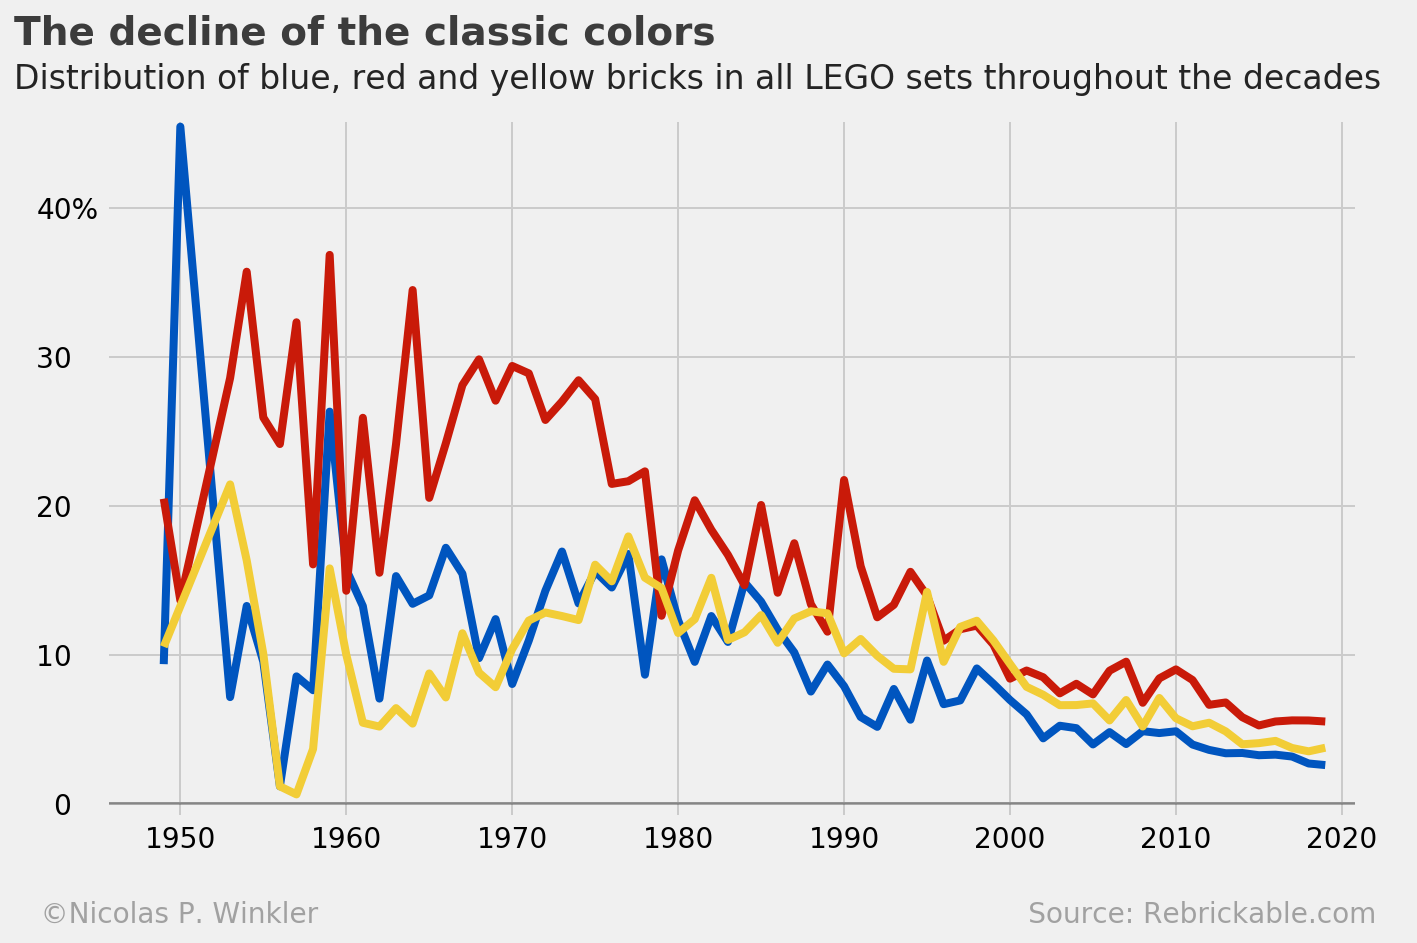

In [40]:
cpalette = sns.color_palette('#' + df_rby.RGB.unique())
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Year', y='Percentage', hue='Color', palette=cpalette, data=df_rby, legend=False)

######################
# Make the plot pretty
######################

plt.ylim(-1, 46)
plt.xlim(xmax=2021)

ax.axhline(y=0, color='#414141', linewidth=1.3, alpha=0.5)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_yticklabels(labels = ['','0   ', '10   ', '20   ', '30   ', '40%'])

# Title and subtitle
ax.text(x = 1940, y = 51, s = "The decline of the classic colors", fontsize = 19.5, weight = 'bold', alpha = .75)
ax.text(x = 1940, y = 48, s = 'Distribution of blue, red and yellow bricks in all LEGO sets throughout the decades', fontsize = 16.5, alpha = .85)

# Footer
ax.text(x = 1940, y = -8,
    s = '   ©Nicolas P. Winkler                                                                                Source: Rebrickable.com   ',
    fontsize = 14, color = 'grey', alpha=0.7);

# Save the figure
#plt.savefig('classic_colors.png', bbox_inches = 'tight', dpi=150)
plt.show()

# Rise of new colors

In [7]:
# Get all colors before 1990 and in 2019 in separate dataframes
df_1980 = df_colors.loc[df_colors["Year"]<=1990]
df_2019 = df_colors.loc[df_colors["Year"]==2019]

# Get the ten most popular new colors in 2019 --> .head(10)
df_2019 = df_2019.sort_values(by=['Percentage'], ascending=False) # sort the dataframe first
df_top10_new_colors = df_2019[~df_2019.Color.isin(df_1980.Color)].head(10)

df_new_colors = df_colors[df_colors.Color.isin(df_top10_new_colors.Color)]

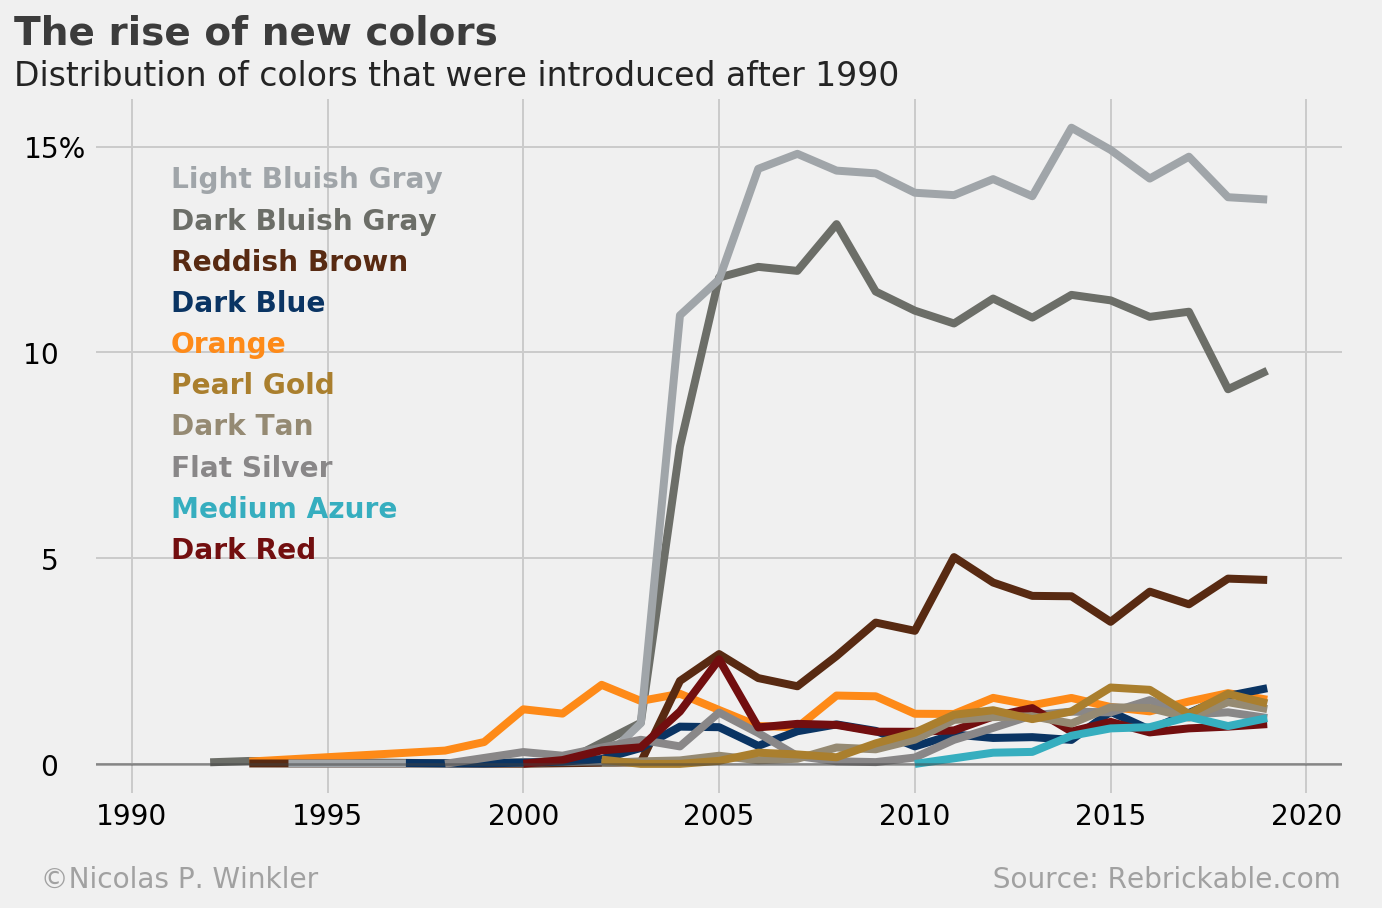

In [11]:
cpalette = sns.color_palette('#'+df_new_colors.RGB.unique())
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Year', y='Percentage', hue='Color', palette=cpalette, data=df_new_colors, legend=False)

plt.xlim(1989, 2021)

ax.axhline(y=0, color='#414141', linewidth=1.3, alpha=0.5)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_yticks([0, 5, 10, 15])
ax.set_yticklabels(labels = ['0   ', '5   ', '10   ', '15%'])

# Title
ax.text(x = 1987, y = 17.5, s = "The rise of new colors", fontsize = 19.5, weight = 'bold', alpha = .75)
ax.text(x = 1987, y = 16.5, s = 'Distribution of colors that were introduced after 1990', fontsize = 16.5, alpha = .85)

ax.text(x = 1987, y = -3,
    s = '   ©Nicolas P. Winkler                                                                            Source: Rebrickable.com   ',
    fontsize = 14, color = 'gray', alpha=0.7);

# Color labels
palette = sns.color_palette('#' + df_top10_new_colors.RGB.unique())
ax.text(x = 1991, y = 14, s = 'Light Bluish Gray', color = palette[0], weight = 'bold')
ax.text(x = 1991, y = 13, s = 'Dark Bluish Gray', color = palette[1], weight = 'bold')
ax.text(x = 1991, y = 12, s = 'Reddish Brown', color = palette[2], weight = 'bold')
ax.text(x = 1991, y = 11, s = 'Dark Blue', color = palette[3], weight = 'bold')
ax.text(x = 1991, y = 10, s = 'Orange', color = palette[4], weight = 'bold')
ax.text(x = 1991, y = 9, s = 'Pearl Gold', color = palette[5], weight = 'bold')
ax.text(x = 1991, y = 8, s = 'Dark Tan', color = palette[6], weight = 'bold')
ax.text(x = 1991, y = 7, s = 'Flat Silver', color = palette[7], weight = 'bold')
ax.text(x = 1991, y = 6, s = 'Medium Azure', color = palette[8], weight = 'bold')
ax.text(x = 1991, y = 5, s = 'Dark Red', color = palette[9], weight = 'bold')

#plt.savefig('new_colors.png', bbox_inches = 'tight', dpi=150)
plt.show()

# What about transparent colors?

In [19]:
df_trans = df.groupby(['year', 'name_y', 'rgb', 'is_trans']).size().reset_index(name='counts')
df_trans = df_trans.groupby(['year', 'name_y', 'rgb', 'is_trans']).agg({'counts': 'sum'})

df_trans = df_trans.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
df_trans = df_trans[df_trans['is_trans']=='t']
df_trans.columns = ['Year', 'Color', 'RGB', 'is_trans', 'Percentage']

In [36]:
df50s = df_trans[(df_trans.Year>=1950) & (df_trans.Year <1959)]
df60s = df_trans[(df_trans.Year>=1960) & (df_trans.Year <1969)]
df70s = df_trans[(df_trans.Year>=1970) & (df_trans.Year <1979)]
df80s = df_trans[(df_trans.Year>=1980) & (df_trans.Year <1989)]
df90s = df_trans[(df_trans.Year>=1990) & (df_trans.Year <1999)]
df00s = df_trans[(df_trans.Year>=2000) & (df_trans.Year <2009)]
df10s = df_trans[(df_trans.Year>=2010) & (df_trans.Year <2019)]

df50s = df50s.groupby(['Color', 'RGB']).mean().reset_index()
df60s = df60s.groupby(['Color', 'RGB']).mean().reset_index()
df70s = df70s.groupby(['Color', 'RGB']).mean().reset_index()
df80s = df80s.groupby(['Color', 'RGB']).mean().reset_index()
df90s = df90s.groupby(['Color', 'RGB']).mean().reset_index()
df00s = df00s.groupby(['Color', 'RGB']).mean().reset_index()
df10s = df10s.groupby(['Color', 'RGB']).mean().reset_index()

df50s = df50s.drop(columns=['Year'])
df50s['Decade'] = 1950
df60s = df60s.drop(columns=['Year'])
df60s['Decade'] = 1960
df70s = df70s.drop(columns=['Year'])
df70s['Decade'] = 1970
df80s = df80s.drop(columns=['Year'])
df80s['Decade'] = 1980
df90s = df90s.drop(columns=['Year'])
df90s['Decade'] = 1990
df00s = df00s.drop(columns=['Year'])
df00s['Decade'] = 2000
df10s = df10s.drop(columns=['Year'])
df10s['Decade'] = 2010

df_decades = pd.concat([df50s, df60s, df70s, df80s, df90s, df00s, df10s])
cpalette = '#' + df_decades['RGB'].unique()
df_decades = df_decades.pivot(columns='Color', index='Decade')

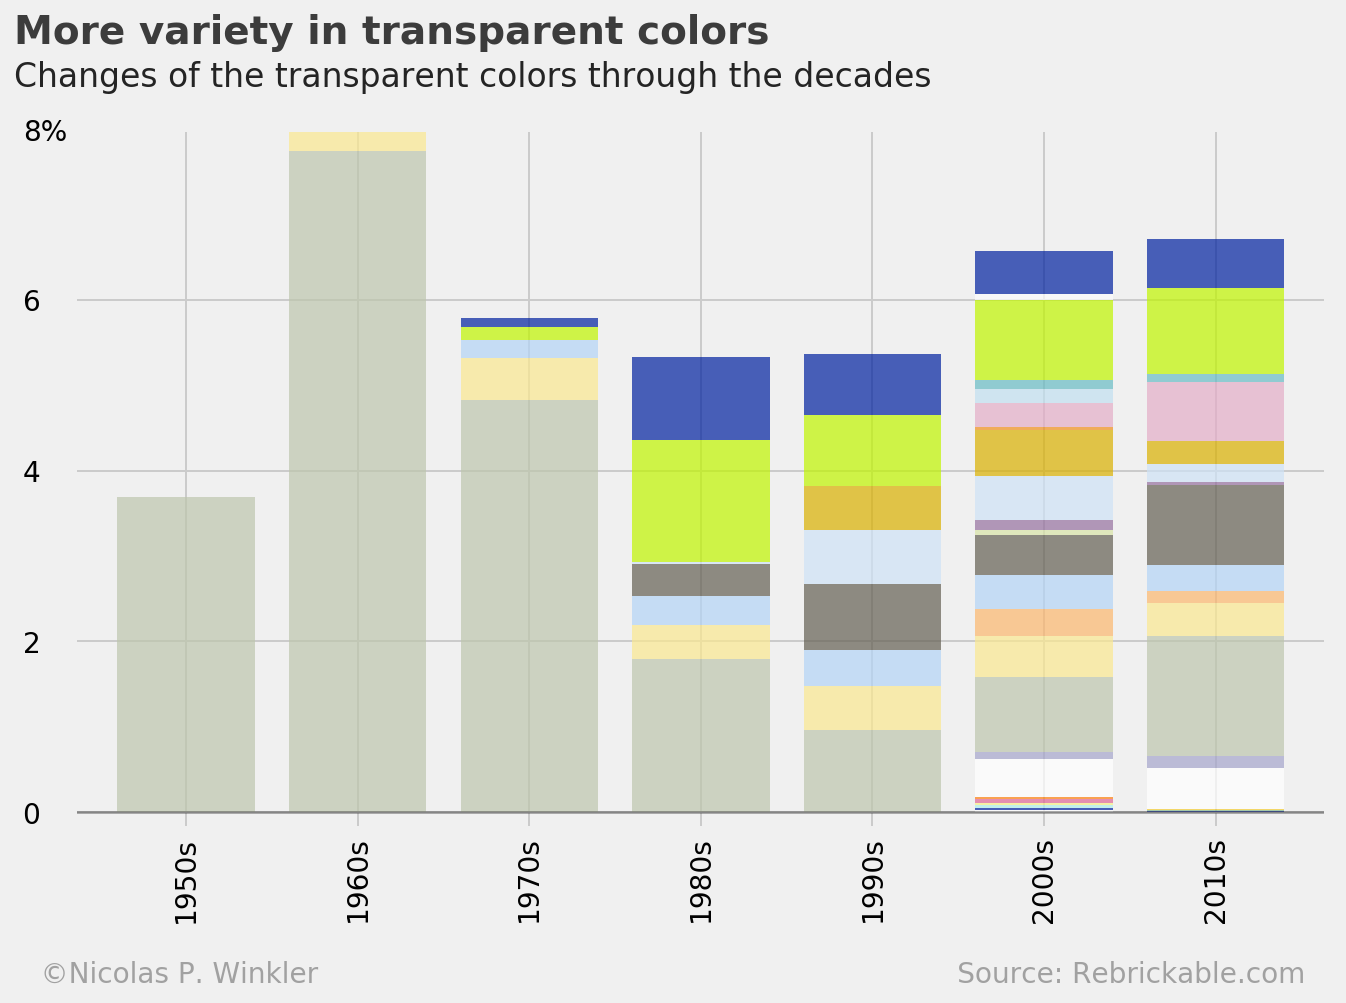

In [37]:
palette = []
for c in cpalette: 
    c = mpl.colors.to_rgba(c, 0.7)
    palette.append(c)
    
ax = df_decades.plot(kind='bar',stacked=True, legend=False, color=palette, figsize=(10,6), width=0.8)

plt.ylim(-0.2, 8)

ax.axhline(y=0, color='#414141', linewidth=1.3, alpha=0.5)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_yticks([0, 2, 4, 6, 8])
ax.set_yticklabels(labels = ['0   ', '2   ', '4   ', '6   ','8%'])
ax.set_xticklabels(labels = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s',])


# Title
ax.text(x = -1, y = 9, s = "More variety in transparent colors", fontsize = 19.5, weight = 'bold', alpha = .75)
ax.text(x = -1, y = 8.5, s = 'Changes of the transparent colors through the decades', fontsize = 16.5, alpha = .85)

ax.text(x = -1, y = -2,
    s = '   ©Nicolas P. Winkler                                                                        Source: Rebrickable.com   ',
    fontsize = 14, color = 'grey', alpha=0.7);

#plt.savefig('transparent_colors.png', bbox_inches = 'tight', dpi=150)
plt.show()